 Fs=1000 hz
 Ts=0.001 s


(-100.0, 100.0)

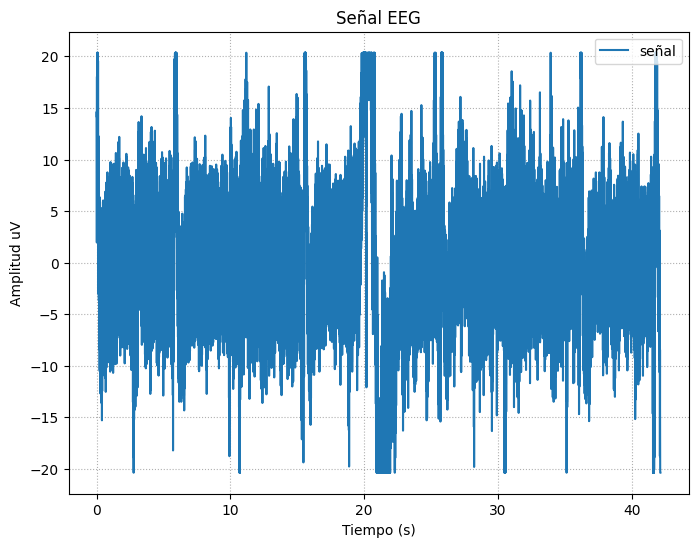

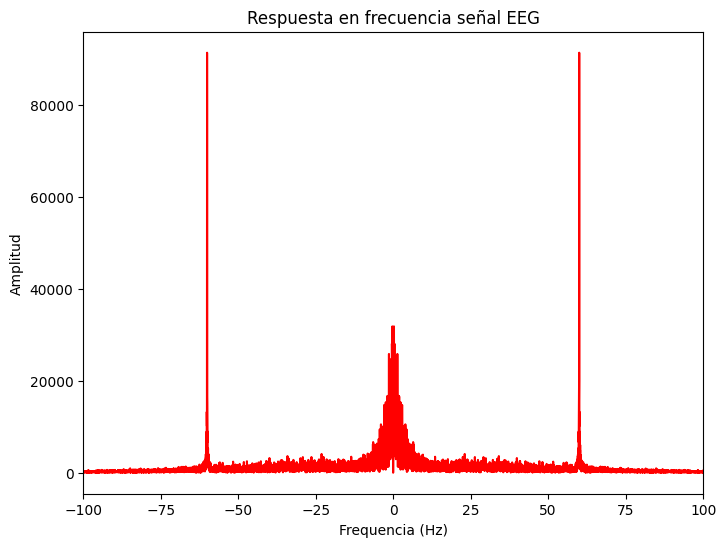

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
from scipy import signal
import pywt
from scipy.signal import firwin, lfilter
from scipy.fftpack import fft, fftshift


f = open("ojosV.txt","r")
raw_data = f.read()  # con f.read() leemos todo el contenido
f.close()

raw_data
Fs = 1000
Ts = 1/Fs
print(f" Fs={Fs} hz\n Ts={Ts} s")

a = np.genfromtxt("./ojosV.txt", delimiter="\t",skip_header = 3)
eeg = a[:, 5]
N=len(eeg)
eeg = eeg - np.mean(eeg)
eeg = np.array(eeg) * 40000/1000000
t = np.arange(1, len(eeg)+1)/Fs
plt.figure(figsize=(8, 6))
plt.plot(t, eeg, label="señal")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.legend(loc="upper right")
plt.title("Señal EEG")
plt.grid(linestyle=":")


#FFT
def fft_fun(x, fs):
    X = fftshift(fft(x))
    N = len(X)
    w = 2 * np.pi * np.arange(N) / N
    w = np.unwrap(fftshift(w)) - 2 * np.pi
    wHz = w * fs / (2 * np.pi)
    return wHz, X


wHz, Y = fft_fun(eeg, Fs)

#Grafica FFT EEG
plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EEG")
plt.xlim(-100, 100)











0.07


(-100.0, 100.0)

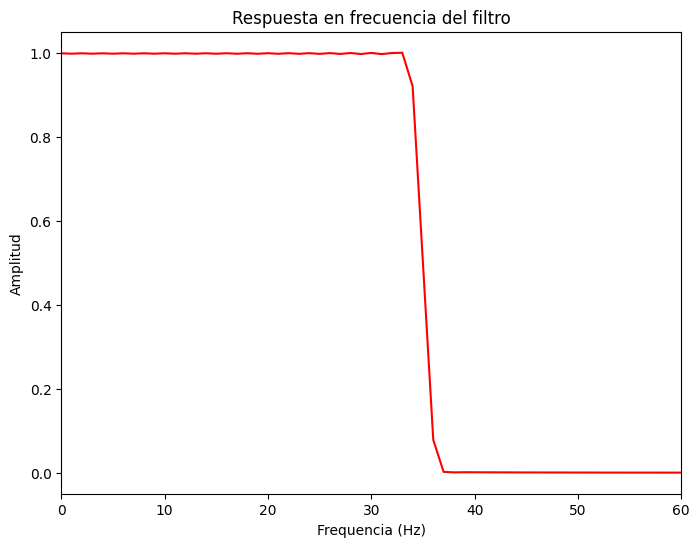

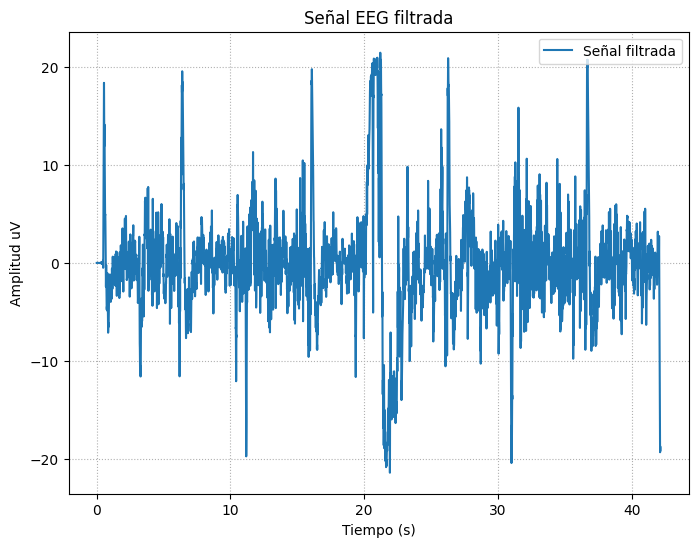

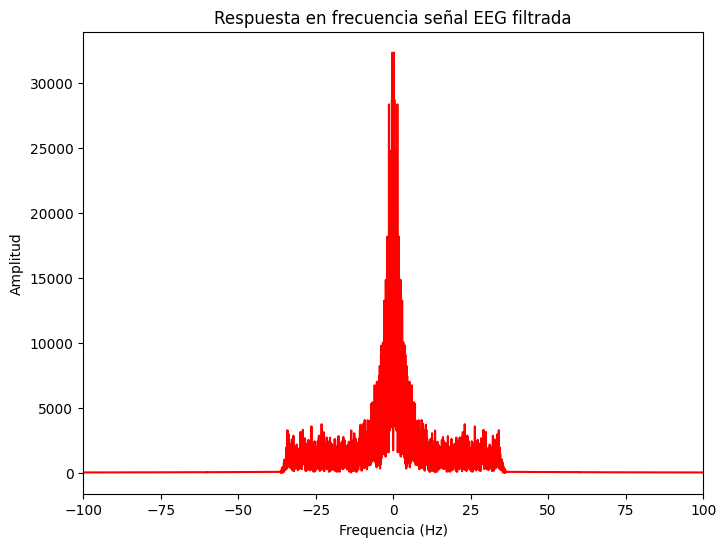

In [18]:

# Definir frecuencia de corte del filtro pasabajo
wp = 30  / (Fs / 2)
ws = 40  / (Fs / 2)
wc=(wp + ws) / 2

print(wc)
dw= ws-wp
lowpass_filter= firwin(numtaps=M, cutoff=wc,  window='hamming')

# Definir el orden del filtro


wHz, Y = fft_fun(lowpass_filter, Fs)

plt.figure(figsize=(8, 6))

plt.plot(wHz, np.abs(Y), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia del filtro")
plt.xlim(0, 60)



filtered_signal = lfilter(lowpass_filter, 1, eeg)

wHz, filtered_signal_fft = fft_fun(filtered_signal, Fs)

t = np.arange(1, len(filtered_signal)+1)/Fs

plt.figure(figsize=(8, 6))
plt.plot(t, filtered_signal, label="Señal filtrada")
plt.title("Señal EEG filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud uV")
plt.legend(loc="upper right")
plt.grid(linestyle=":")


#Grafica FFT EEG filtrada
plt.figure(figsize=(8, 6))
plt.plot(wHz, np.abs(filtered_signal_fft), "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Respuesta en frecuencia señal EEG filtrada")
plt.xlim(-100, 100)



(0.0, 40.0)

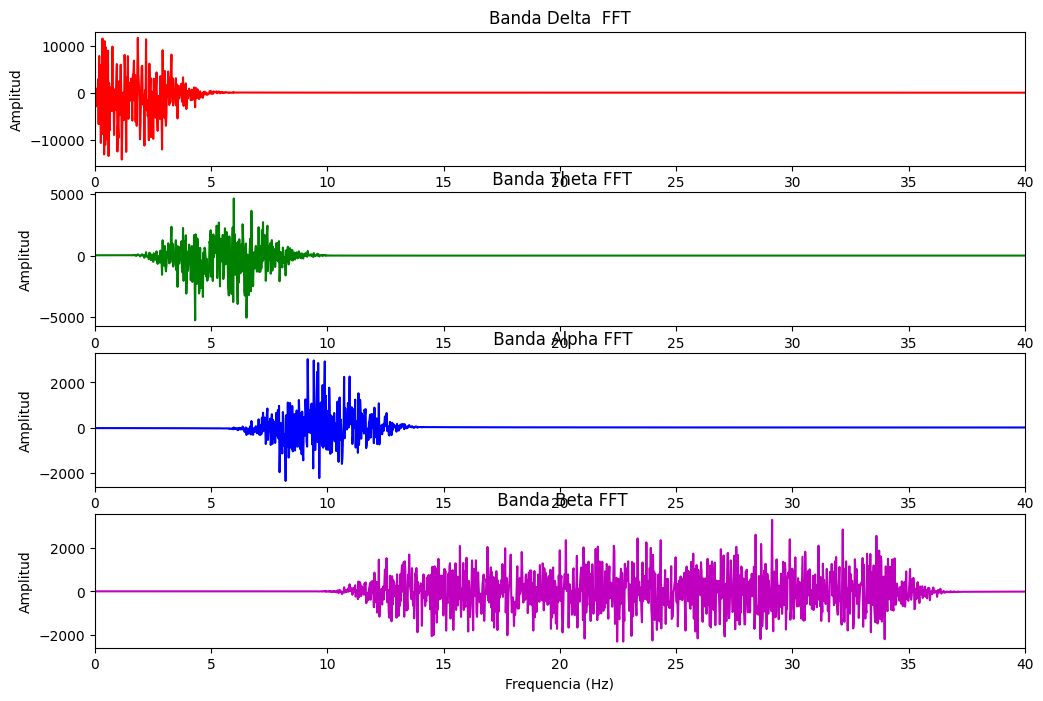

In [19]:
# Definir la longitud de la ventana y la frecuencia de muestreo
M = 1000

# Definir las frecuencias de corte para las bandas de interés
f_delta = (0.5, 4)  # Frecuencia para la banda delta (en Hz)
f_theta = (4, 8)    # Frecuencia para la banda theta (en Hz)
f_alpha = (8, 12)   # Frecuencia para la banda alfa (en Hz)
f_beta = (12, 35)   # Frecuencia para la banda beta (en Hz)



# Crear los filtros para cada banda
f1=0.5/(0.5 * Fs)
f2=4/(0.5 * Fs)
w_delta = firwin(numtaps=M, cutoff=[f1 ,f2], pass_zero=False , window='blackman')
f1=4/(0.5 * Fs)
f2=8/(0.5 * Fs)
w_theta = firwin(numtaps=M, cutoff=[f1 ,f2], pass_zero=False , window='blackman')
f1=8/(0.5 * Fs)
f2=12/(0.5 * Fs)
w_alpha = firwin(numtaps=M, cutoff=[f1 ,f2], pass_zero=False , window='blackman')
f1=12/(0.5 * Fs)
f2=35/(0.5 * Fs)
w_beta = firwin(numtaps=M, cutoff=[f1 ,f2], pass_zero=False , window='blackman')


# Aplicar cada filtro pasabanda a la señal EEG
eeg_delta = lfilter(w_delta, 1, eeg)
eeg_theta = lfilter(w_theta, 1, eeg)
eeg_alpha = lfilter(w_alpha, 1, eeg)
eeg_beta = lfilter(w_beta, 1, eeg)

# Calcular la transformada de Fourier de cada banda
wHz_delta, delta_spectrum = fft_fun(eeg_delta, Fs)
wHz_theta, theta_spectrum = fft_fun(eeg_theta, Fs)
wHz_alpha, alpha_spectrum = fft_fun(eeg_alpha, Fs)
wHz_beta, beta_spectrum = fft_fun(eeg_beta, Fs)


# Plot de cada banda
plt.figure(figsize=(12, 8))

# Delta
plt.subplot(4, 1, 1)
plt.plot(wHz_delta, delta_spectrum, "r")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title("Banda Delta  FFT")
plt.xlim(0, 40)

# Theta
plt.subplot(4, 1, 2)
plt.plot(wHz_theta, theta_spectrum, "g")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title(" Banda Theta FFT")
plt.xlim(0, 40)

# Alpha
plt.subplot(4, 1, 3)
plt.plot(wHz_alpha, alpha_spectrum, "b")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title(" Banda Alpha FFT")
plt.xlim(0, 40)

# Beta
plt.subplot(4, 1, 4)
plt.plot(wHz_beta, beta_spectrum, "m")
plt.xlabel("Frequencia (Hz)")
plt.ylabel("Amplitud")
plt.title(" Banda Beta FFT")
plt.xlim(0, 40)







Text(0.5, 1.0, 'Señal EEG - Banda Beta')

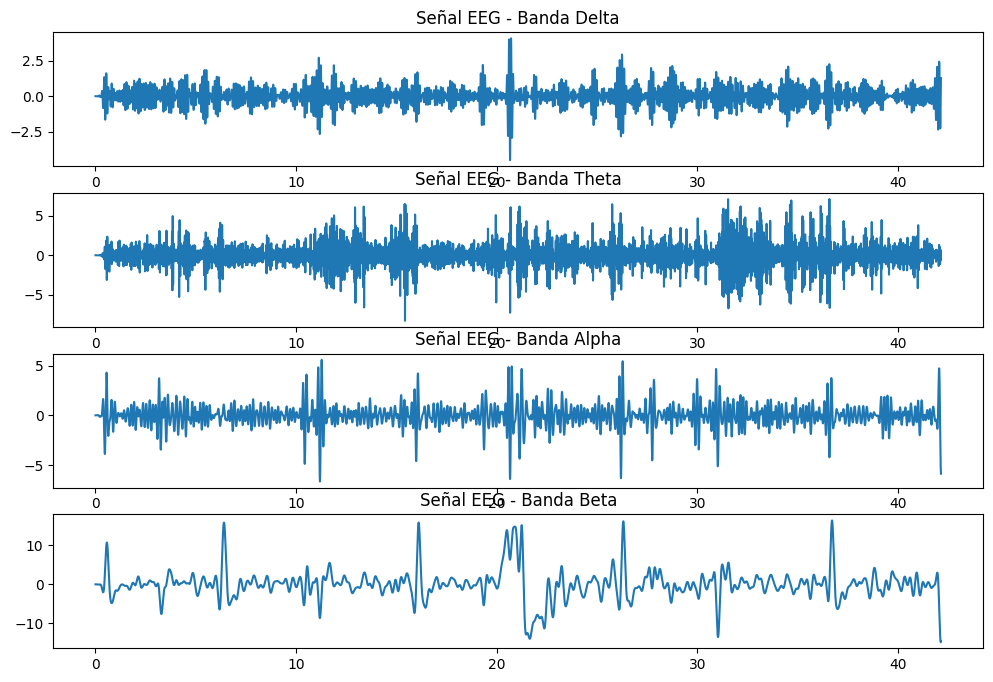

In [20]:
# Graficar los resultados
t1= np.arange(1, len(eeg_delta)+1)/Fs
t2= np.arange(1, len(eeg_theta)+1)/Fs
t3= np.arange(1, len(eeg_alpha)+1)/Fs
t4= np.arange(1, len(eeg_beta)+1)/Fs

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(t1, eeg_alpha)
plt.title('Señal EEG - Banda Delta')
plt.subplot(4, 1, 2)
plt.plot(t2 , eeg_beta)
plt.title('Señal EEG - Banda Theta')
plt.subplot(4, 1, 3)
plt.plot(t3 , eeg_theta)
plt.title('Señal EEG - Banda Alpha')
plt.subplot(4, 1, 4)
plt.plot(t4, eeg_delta)
plt.title('Señal EEG - Banda Beta')

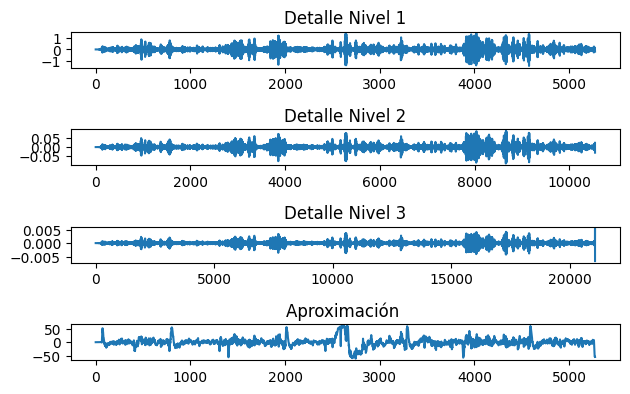

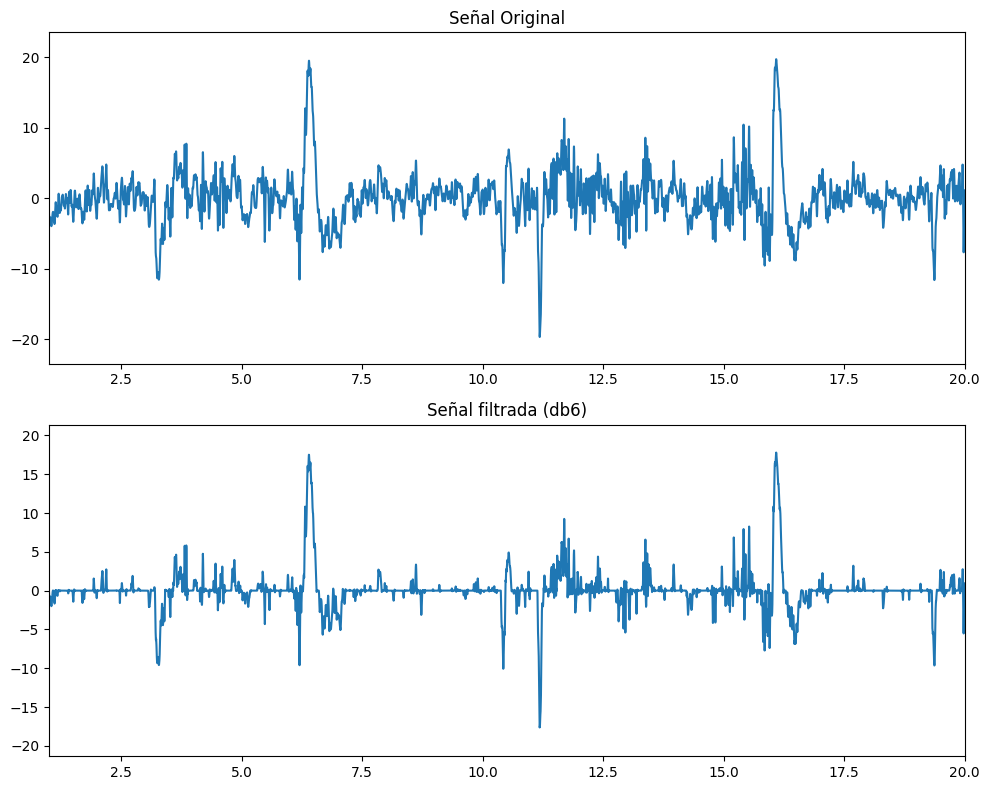

In [36]:
niveles = 3
coeficientes = pywt.wavedec(filtered_signal, 'db4', level=niveles)



# Graficar los coeficientes de detalle
for i, detalle in enumerate(coeficientes[1:]):  # Empezar desde el segundo nivel
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

# Graficar el coeficiente de aproximación
plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación ')

plt.tight_layout()
plt.show()


umbral = 5.6

coeficientes_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeficientes]

senal_denoised = pywt.waverec(coeficientes_umbral, 'db4')

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t1, filtered_signal)
plt.xlim(1,20)
plt.title('Señal Original')

plt.subplot(2, 1, 2)
plt.plot(t1, senal_denoised)
plt.xlim(1,20)
plt.title('Señal filtrada (db6)')

plt.tight_layout()
plt.show()



